# Name : Vipashyana Uttam Jawale
## Assignement No 06

## Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv("ToyotaCorolla - MLR.csv")
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [48]:
# Given Information
# we have to build a multi linear regression model
# price in euro's is our target column that we have to predict

In [49]:
data.shape

(1436, 11)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [51]:
## from this, we detect there is no single missing value present in the dataset 
data.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [52]:
## using this, we got a duplicate value in the dataset
data[data.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [53]:
## delete duplicate value
data.drop_duplicates(inplace = True)

In [54]:
data.shape

(1435, 11)

In [55]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


In [56]:
new_data = data.drop('Fuel_Type', axis = 1)

In [57]:
new_data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025
1432,10845,72,19000,86,0,1300,3,4,5,1015
1433,8500,71,17016,86,0,1300,3,4,5,1015
1434,7250,70,16916,86,0,1300,3,4,5,1015


In [58]:
## there is a highly negative correlation between price and Age_08_04
new_data.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,NaN,0.021238,1.000000


In [59]:
new_data.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170


In [60]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     154
CNG         17
Name: count, dtype: int64

<Axes: xlabel='Fuel_Type'>

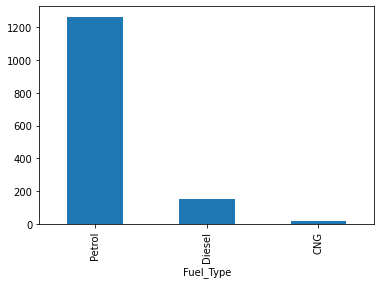

In [61]:
## according to this we find that most of the corolla has petrol engine
data['Fuel_Type'].value_counts().plot(kind = 'bar')

In [62]:
## In Cylinder Column, there is only one value which is 4. this column is not useful to build a model so we delete this column
data['Cylinders'].value_counts()

Cylinders
4    1435
Name: count, dtype: int64

In [63]:
data.drop('Cylinders',axis = 1, inplace = True)

In [64]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [65]:
data['Gears'].value_counts()

Gears
5    1389
6      43
3       2
4       1
Name: count, dtype: int64

<Axes: xlabel='Gears'>

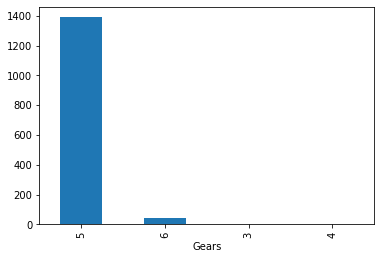

In [66]:
## according to this bar chart, we conclude that most of the cars have 5 gears
data['Gears'].value_counts().plot(kind = 'bar')

In [67]:
data['Doors'].value_counts()

Doors
5    673
3    622
4    138
2      2
Name: count, dtype: int64

<Axes: xlabel='Doors'>

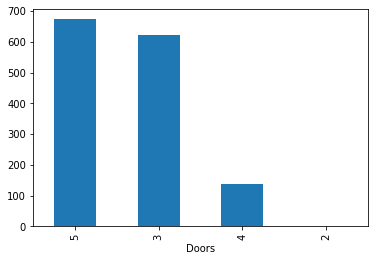

In [68]:
## according to bar chart, we conclude that most of the cars have 5 and 3 doors.
data['Doors'].value_counts().plot(kind = 'bar')

In [69]:
data['Automatic'].value_counts()

Automatic
0    1355
1      80
Name: count, dtype: int64

<Axes: xlabel='Automatic'>

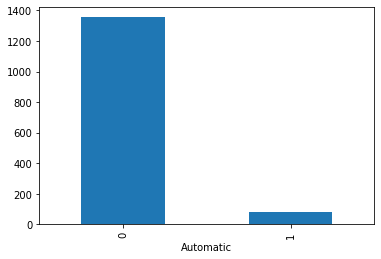

In [70]:
## there are mant non automatic cars presnt in the dataset
data['Automatic'].value_counts().plot(kind = 'bar')

In [71]:
data['HP'].value_counts()

HP
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      8
98       2
71       1
73       1
Name: count, dtype: int64

<Axes: xlabel='HP'>

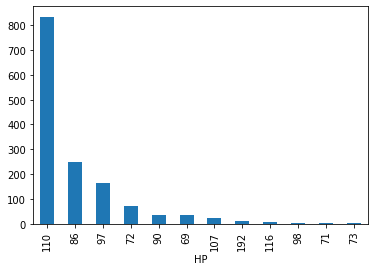

In [72]:
data['HP'].value_counts().plot(kind = 'bar')

In [73]:
data['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [74]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Diesel':0, 'Petrol':1, 'CNG':2})

In [75]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,0,90,0,2000,3,5,1165
1,13750,23,72937,0,90,0,2000,3,5,1165
2,13950,24,41711,0,90,0,2000,3,5,1165
3,14950,26,48000,0,90,0,2000,3,5,1165
4,13750,30,38500,0,90,0,2000,3,5,1170


# Model Building

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
X = data.iloc[:, 1:]
y = data.iloc[:, :1]
print(X.head())
print(y.head())

   Age_08_04     KM  Fuel_Type  HP  Automatic    cc  Doors  Gears  Weight
0         23  46986          0  90          0  2000      3      5    1165
1         23  72937          0  90          0  2000      3      5    1165
2         24  41711          0  90          0  2000      3      5    1165
3         26  48000          0  90          0  2000      3      5    1165
4         30  38500          0  90          0  2000      3      5    1170
   Price
0  13500
1  13750
2  13950
3  14950
4  13750


In [78]:
X

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,0,90,0,2000,3,5,1165
1,23,72937,0,90,0,2000,3,5,1165
2,24,41711,0,90,0,2000,3,5,1165
3,26,48000,0,90,0,2000,3,5,1165
4,30,38500,0,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...
1431,69,20544,1,86,0,1300,3,5,1025
1432,72,19000,1,86,0,1300,3,5,1015
1433,71,17016,1,86,0,1300,3,5,1015
1434,70,16916,1,86,0,1300,3,5,1015


In [79]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [81]:
X_train

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
1128,78,109263,1,110,0,1600,5,5,1070
899,62,59295,1,86,0,1300,5,5,1035
1188,71,90370,1,86,0,1300,5,5,1035
311,44,38461,1,110,0,1600,5,5,1080
1145,75,101855,1,110,0,1600,5,5,1070
...,...,...,...,...,...,...,...,...,...
1096,75,125400,1,110,0,1600,3,5,1050
1131,75,107000,1,110,0,1600,3,5,1050
1295,80,71500,1,110,0,1600,4,5,1035
861,65,64630,1,110,0,1600,5,5,1070


In [82]:
y_train

,Price
1128,7500
899,9500
1188,7950
311,13995
1145,6450
...,...
1096,7900
1131,9950
1295,7500
861,10950


In [83]:
y_test

,Price
753,9950
858,7995
630,7500
1412,9950
975,8950
...,...
1113,5750
175,19950
1428,8450
298,13995


In [84]:
model = LinearRegression()

In [85]:
model.fit(X_train,y_train)

LinearRegression()

In [86]:
y_pred = model.predict(X_test)
y_pred

array([[10687.33845516],
       [10309.88741733],
       [ 9295.23911236],
       [ 9410.84283016],
       [ 8476.34353889],
       [ 8417.43706623],
       [ 8048.99169933],
       [ 8290.51459635],
       [11771.59982282],
       [12407.19823069],
       [ 9380.44336529],
       [ 9339.68455479],
       [13179.86955934],
       [12296.4815967 ],
       [ 8979.86061551],
       [11573.61315778],
       [12332.51461172],
       [17411.19828934],
       [12228.26413201],
       [11528.79804472],
       [11537.91593932],
       [18073.66536009],
       [ 9841.28927878],
       [10440.3427702 ],
       [ 7358.48989648],
       [15995.01540093],
       [ 7119.60797347],
       [ 8328.8680075 ],
       [15581.38122405],
       [13870.89998982],
       [ 8124.57621488],
       [10622.54677686],
       [10080.61646685],
       [10101.3154946 ],
       [10080.09134979],
       [ 8565.43049853],
       [ 8808.02444275],
       [ 9966.44413205],
       [16284.42929148],
       [10677.6367201 ],


In [87]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 2046779.0237429624
R-squared: 0.8293943317900825


In [88]:
type(y_test), type(y_pred.flatten())

(pandas.core.frame.DataFrame, numpy.ndarray)

In [89]:
import numpy as np
new_df = pd.DataFrame({'actual' : y_test.values.flatten(), 'predicted' :y_pred.flatten()})
new_df

,actual,predicted
0,9950,10687.338455
1,7995,10309.887417
2,7500,9295.239112
3,9950,9410.842830
4,8950,8476.343539
...,...,...
282,5750,7163.081392
283,19950,19135.376833
284,8450,8027.486194
285,13995,14025.702428


# Interview Questions

### 1. What is Normalization & Standardization, and how is it helpful?

Normalization and Standardization: Definition & Purpose
Normalization and standardization are two commonly used feature scaling techniques in machine learning. They ensure that numerical features are on a comparable scale, which improves model performance and convergence, especially for distance-based algorithms or optimization-based models.

#### Normalization:

Normalization rescales the values of a dataset to a fixed range, usually [0,1] or [-1,1]. It is particularly useful when the data does not follow a normal distribution and is used in distance-based algorithms like K-Nearest Neighbors (KNN), K-Means Clustering, and Neural Networks.


Advantages of Normalization:

✔ Preserves relationships between values

✔ Suitable for non-Gaussian (non-normal) distributions

✔ Helps models that rely on distance metrics (KNN, K-Means, Neural Networks)

Disadvantages of Normalization:

❌ Sensitive to outliers (since it depends on min/max values)

#### Standardization:

Standardization (also called Z-score normalization) transforms data so that it has a mean of 0 and a standard deviation of 1. It is commonly used in linear regression, logistic regression, support vector machines (SVM), and principal component analysis (PCA).

Advantages of Standardization:

✔ Handles outliers better than normalization

✔ Suitable for normally distributed data

✔ Essential for models assuming normal distribution (e.g., linear regression, logistic regression, PCA)

Disadvantages of Standardization:

❌ Does not bound the values within a specific range (e.g., [0,1])

### 2. What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when two or more independent variables (features) in a regression model are highly correlated. This makes it difficult to determine the individual effect of each predictor on the target variable, leading to unstable coefficient estimates.

#### Why is Multicollinearity a Problem?
Inflated standard errors in regression coefficients
Unstable estimates (small changes in data can lead to large changes in coefficients)
Redundancy in predictor variables

#### How to Detect Multicollinearity?

Variance Inflation Factor (VIF):

The Variance Inflation Factor (VIF) quantifies multicollinearity by measuring how much the variance of a coefficient is inflated due to correlation with other predictors.